In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/gnikh/Downloads/Super_International_Market.csv", encoding='latin1')
data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,5/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,17-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,28-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,5/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,20-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,12/2/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,18-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [3]:
df1 = data.copy()

In [4]:
df1 = df1.drop(columns='Postal Code')
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='mixed').dt.strftime('%d-%m-%Y')
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'], format='mixed').dt.strftime('%d-%m-%Y')
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])
df1[['Ship Mode', 'Segment', 'Country',
       'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']] = df1[['Ship Mode', 'Segment', 'Country',
       'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']].astype('category')

C:\Users\gnikh\AppData\Local\Temp\ipykernel_2696\3974634585.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Order Date'] = pd.to_datetime(df1['Order Date'])
C:\Users\gnikh\AppData\Local\Temp\ipykernel_2696\3974634585.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])


In [5]:
negative_profit = df1[df1['Profit'] < 0]
pos_profit = df1[df1['Profit'] >= 0]
mean_profit = pos_profit['Profit'].mean()
mean_profit

61.634838357507874

In [6]:
df2 = df1.copy()

In [7]:
df2.loc[df2['Profit'] < 0, 'Profit'] = mean_profit

In [8]:
df2['Year'] = df2['Order Date'].dt.year

In [14]:
city_state_profit = df2.groupby(['City', 'State'])['Profit'].sum().reset_index()
city_state_profit = city_state_profit.sort_values(by='Profit', ascending=False).head()
city_state_profit

,City,State,Profit
2402,New York City,New York,68468.399834
2006,Los Angeles,California,33891.576919
3085,Seattle,Washington,30527.425014
2096,Manila,National Capital,26143.423492
1580,Jakarta,Jakarta,25412.669240


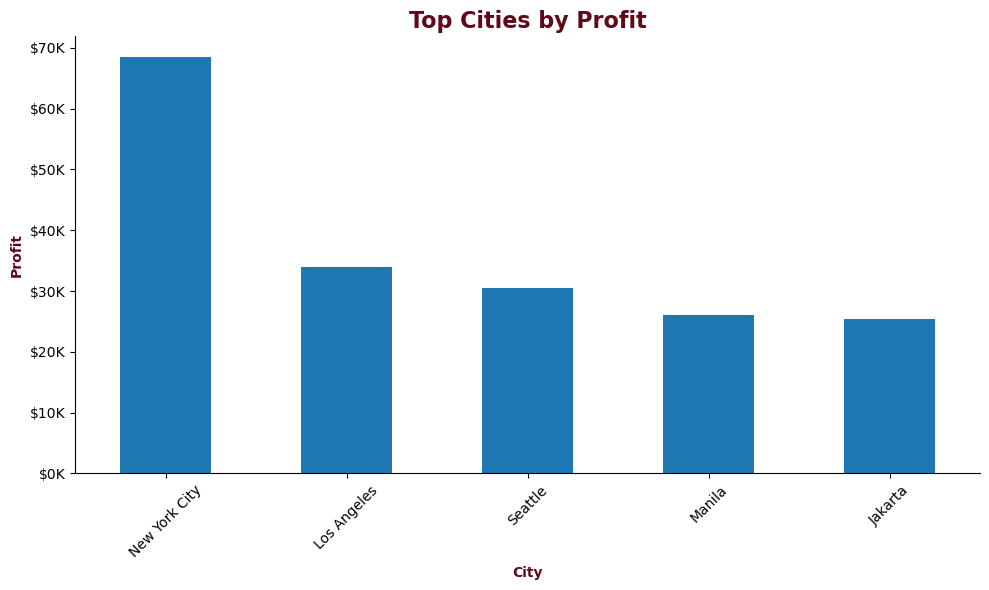

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

city_state_profit.plot(kind='bar', x='City', y='Profit', ax=ax)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Top Cities by Profit', fontsize=16, fontweight='bold', color='#600818')
plt.ylabel('Profit', fontsize=10, fontweight='bold', color='#600818')
plt.xlabel('City', fontsize=10, fontweight='bold', color='#600818')
ax.tick_params('x', rotation=45)
ax.get_legend().remove()
sns.despine()

plt.tight_layout()

In [33]:
top_products = df2.groupby('Product Name')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head()
top_products

,Product Name,Quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259


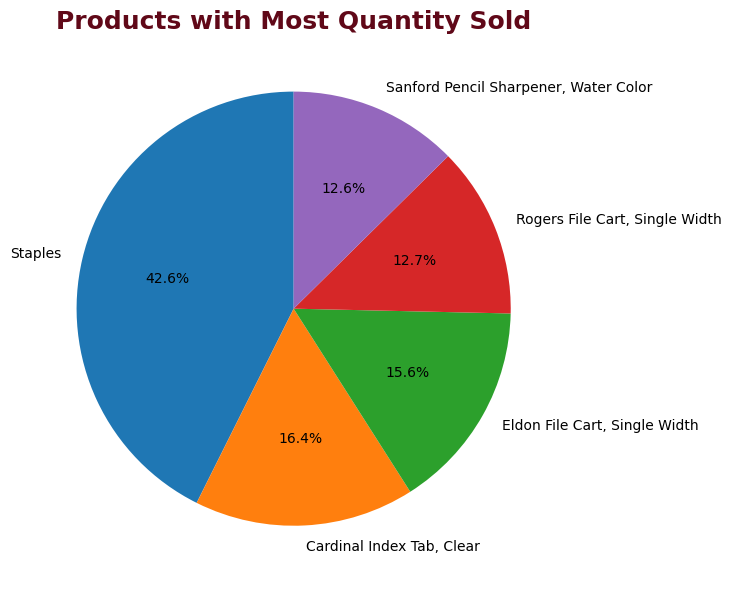

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

ax.pie(top_products['Quantity'], labels=top_products['Product Name'], autopct='%1.1f%%', startangle=90)
ax.set_title('Products with Most Quantity Sold', fontsize=18, fontweight='bold', color='#600818')

plt.tight_layout()

In [49]:
market_sprofit = df2.groupby('Market')[['Sales', 'Profit']].sum().reset_index()
market_sprofit

C:\Users\gnikh\AppData\Local\Temp\ipykernel_2696\3418448931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  market_sprofit = df2.groupby('Market')[['Sales', 'Profit']].sum().reset_index()


,Market,Sales,Profit
0,APAC,3.585744e+06,835093.627750
1,Africa,7.837732e+05,241230.547508
2,Canada,6.692817e+04,17817.390000
3,EMEA,8.061613e+05,265949.434402
4,EU,2.938089e+06,689561.324641
5,LATAM,2.164605e+06,553751.445089
6,US,2.297201e+06,557847.089967


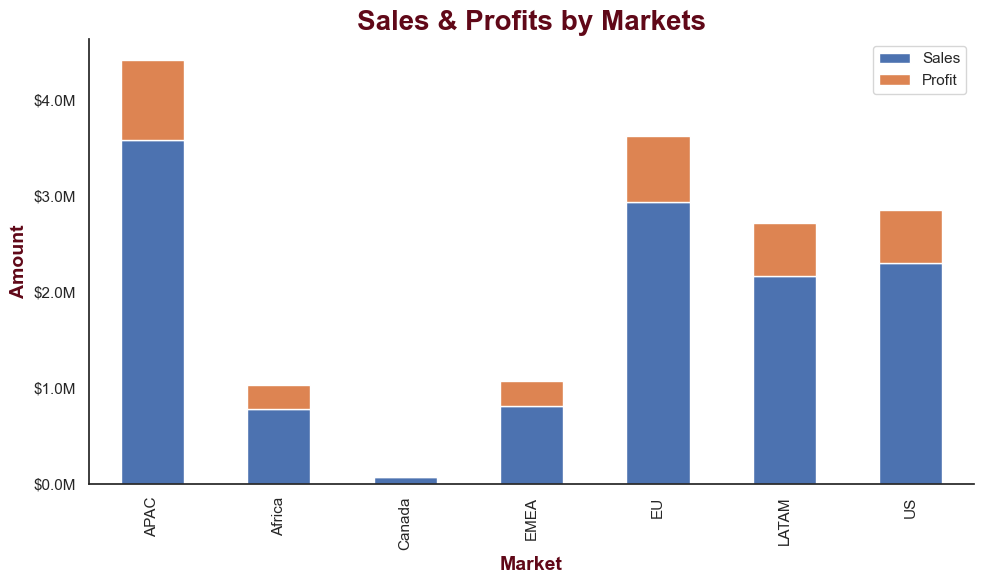

In [65]:
fig, ax = plt.subplots(figsize=(10,6))

market_sprofit.set_index('Market').plot(kind='bar', stacked=True, ax=ax)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000000}M'))
ax.set_title('Sales & Profits by Markets', fontsize=20, fontweight='bold', color='#600818')
ax.set_ylabel('Amount', fontsize=14, fontweight='bold', color='#600818')
ax.set_xlabel('Market', fontsize=14, fontweight='bold', color='#600818')

plt.tight_layout()

sns.despine()